step 1: load data
step 2: visualize data (pairplot, boxplot, scatter)
step 3: clean data (IQR, z-score, threshold)
step 4: impute (mean/median)
step 5: EDA (explain more)
step 6: modeling (regression or classification)
step 7: evaluation
step 8: intepretation

In [195]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# read data
df = pd.read_csv('Iris_data.csv')
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


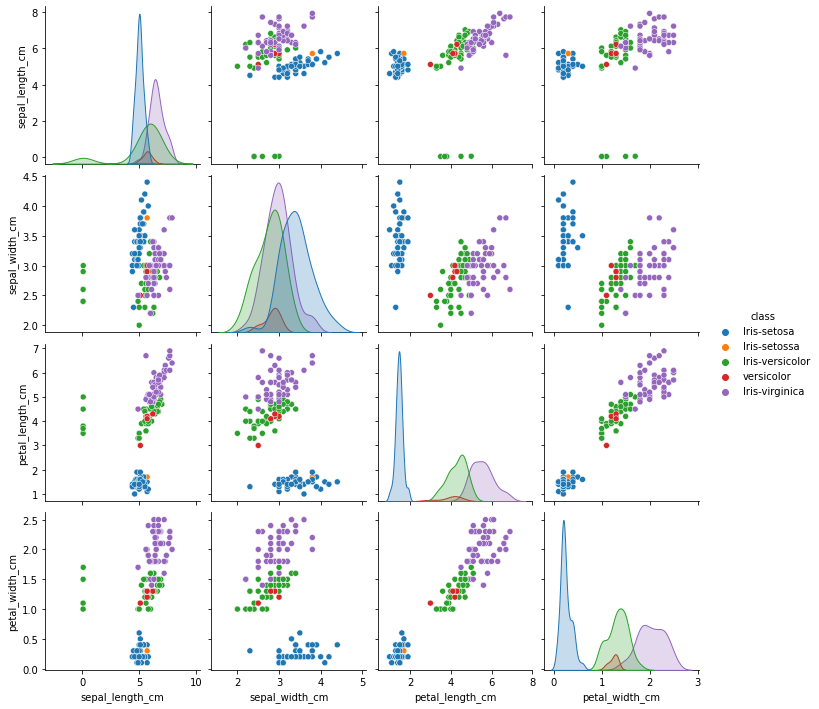

In [6]:
# visualize data
sns.pairplot(df, hue = 'class')

In [27]:
df.shape

(150, 5)

In [41]:
# data cleaning
filt = (df['class'] == 'Iris-versicolor') & (df['sepal_length_cm'] < 1)
filt

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [46]:
# delete outliers
df_rm = df[~filt]

In [47]:
df_rm.shape

(145, 5)

c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


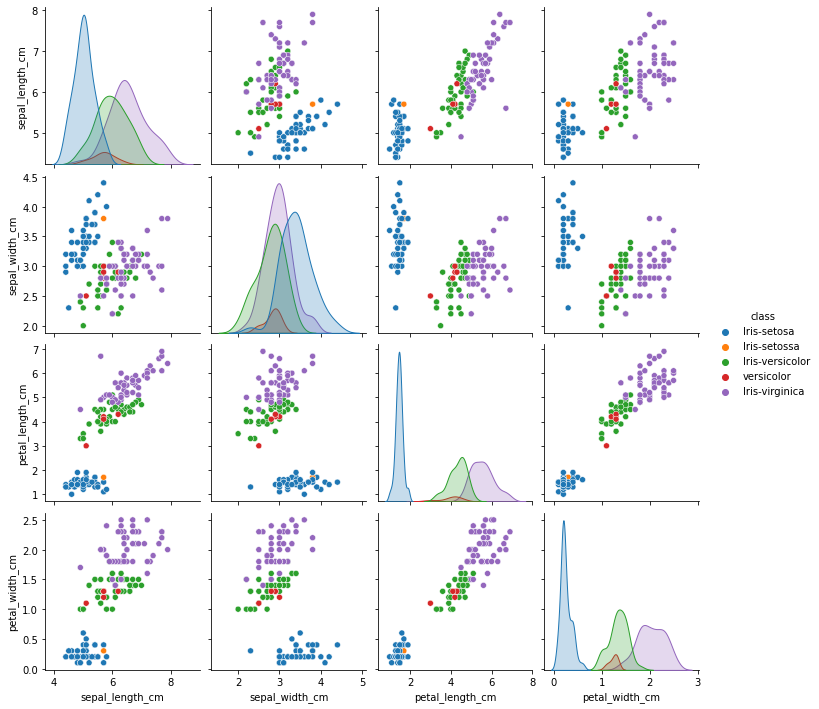

In [48]:
sns.pairplot(df_rm, hue = 'class')

In [45]:
# merge versicolor into Iris-versicolor
filt2 = df['class'] == 'versicolor'
filt2

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: class, Length: 150, dtype: bool

In [49]:
df_rm.loc[df['class'] == 'versicolor'] = 'Iris-versicolor'

c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [51]:
sum(df_rm['class'] == 'versicolor')

0

In [56]:
df_rm.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [65]:
df_rm['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


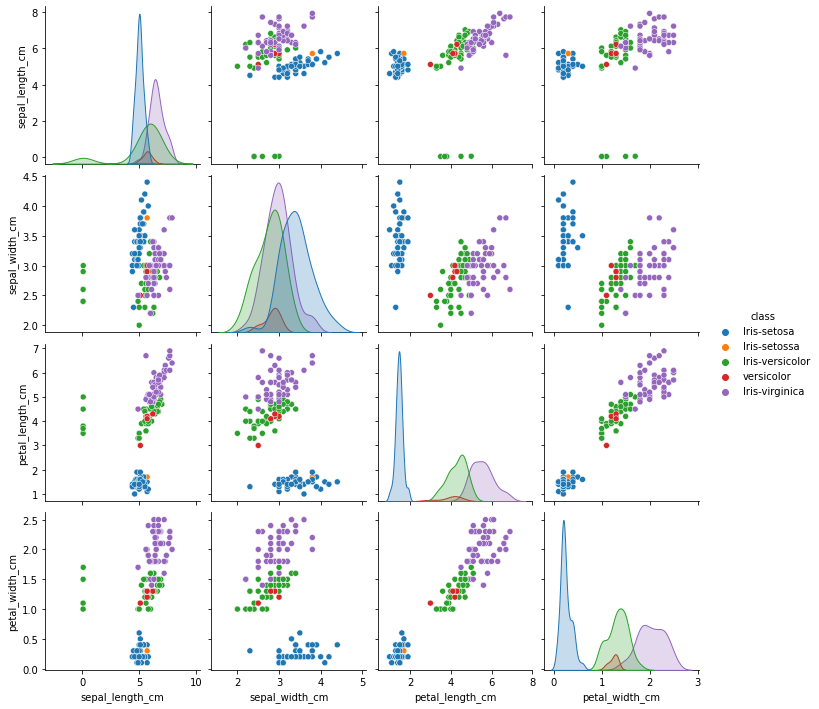

In [62]:
sns.pairplot(df, hue = 'class')

In [66]:
df_rm.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [130]:
# statistical significance different between Iris-setosa, Iris-versicolor, 
# Iris-virginica  in their sepal-width

import scipy as sp
sepal_width_setosa = df_rm.loc[df['class'] == 'Iris-setosa', 'sepal_width_cm']
sepal_width_versi = df_rm.loc[df['class'] == 'Iris-versicolor', 'sepal_width_cm']
sepal_width_virgi = df_rm.loc[df['class'] == 'Iris-virginica', 'sepal_width_cm']


# Analysis of Variance Test (ANOVA)

In [131]:
from scipy.stats import f_oneway
f_oneway(sepal_width_setosa,sepal_width_versi,sepal_width_virgi)

F_onewayResult(statistic=39.503738495697924, pvalue=2.977168986727045e-14)

# Normality Tests

In [132]:
from scipy.stats import normaltest
normaltest(sepal_width_versi)

NormaltestResult(statistic=1.4828504542266427, pvalue=0.47643440417650973)

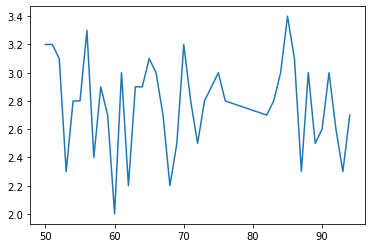

In [133]:
plt.plot(sepal_width_versi)

# Student’s t-test

In [134]:
from scipy.stats import ttest_ind
ttest_ind(sepal_width_setosa, sepal_width_versi)

Ttest_indResult(statistic=8.22467757508276, pvalue=1.7272312896086916e-12)

In [135]:
import researchpy as rp

In [136]:
rp.ttest(sepal_width_setosa, sepal_width_versi)

(         Variable     N      Mean        SD        SE  95% Conf.  Interval
 0  sepal_width_cm  49.0  3.410204  0.380923  0.054418   3.300790  3.519618
 1  sepal_width_cm  40.0  2.780000  0.331430  0.052404   2.674003  2.885997
 2        combined  89.0  3.126966  0.476675  0.050527   3.026554  3.227379,
                                 Independent t-test  results
 0  Difference (sepal_width_cm - sepal_width_cm) =    0.6302
 1                            Degrees of freedom =   87.0000
 2                                             t =    8.2247
 3                         Two side test p value =    0.0000
 4                        Difference < 0 p value =    1.0000
 5                        Difference > 0 p value =    0.0000
 6                                     Cohen's d =    1.7526
 7                                     Hedge's g =    1.7375
 8                                 Glass's delta =    1.6544
 9                                   Pearson's r =    0.6614)

# Paired Student’s t-test

In [137]:
from scipy.stats import ttest_rel

# Correlation Tests: Pearson’s Coefficient

In [154]:
from scipy.stats import pearsonr
r, p = pearsonr(sepal_width_setosa[:-9], sepal_width_versi)
print('r: ', r, '\np: ', p)

r:  -0.0008601740599724157 
p:  0.9957969998812514


In [159]:
cormat = df.corr()
round(cormat,2)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.00,0.07,0.49,0.47
sepal_width_cm,0.07,1.00,-0.42,-0.35
petal_length_cm,0.49,-0.42,1.00,0.96
petal_width_cm,0.47,-0.35,0.96,1.00


<AxesSubplot:>

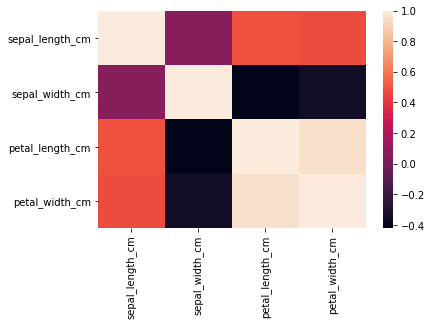

In [160]:
sns.heatmap(cormat)

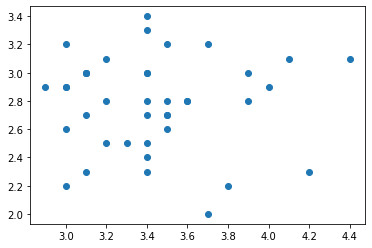

In [140]:
plt.scatter(sepal_width_setosa[:len(sepal_width_versi)], sepal_width_versi)

c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width_cm', ylabel='sepal_length_cm'>

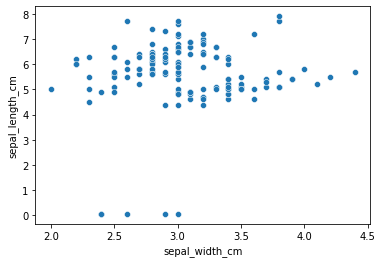

In [157]:
sns.scatterplot('sepal_width_cm', "sepal_length_cm", data = df)

c:\users\searsonlab\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


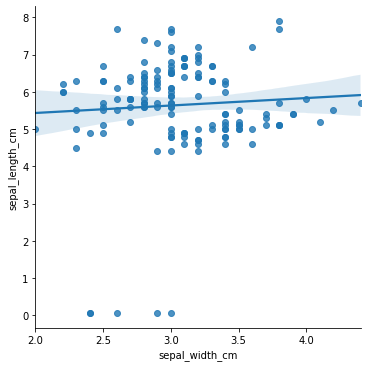

In [158]:
sns.lmplot('sepal_width_cm', "sepal_length_cm", data = df)

# Boxplot

<AxesSubplot:>

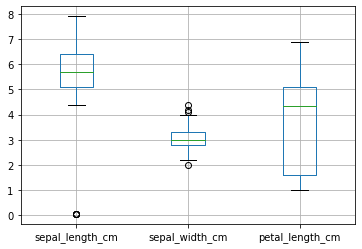

In [139]:
df.boxplot(column=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm'])

<AxesSubplot:xlabel='class', ylabel='sepal_width_cm'>

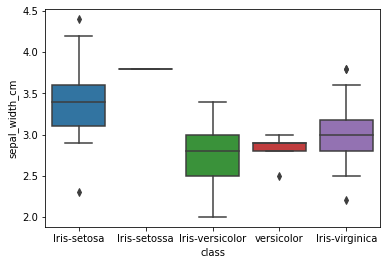

In [173]:
sns.boxplot(x = 'class', y = 'sepal_width_cm' ,data = df)

In [175]:
Q1 = np.percentile(df['sepal_width_cm'], 25, interpolation='midpoint')
Q3 = np.percentile(df['sepal_width_cm'], 75, interpolation='midpoint')
IQR = Q3 - Q1
print(IQR)

0.5


In [180]:
upper = Q3 + 1.5*IQR
upper_out = np.where(df['sepal_width_cm']>upper)
lower = Q1 - 1.5*IQR
lower_out = np.where(df['sepal_width_cm']<lower)
print('upper_outliers: ', upper_out[0])
print('lower_outliers: ', lower_out[0])

upper_outliers:  [15 32 33]
lower_outliers:  [60]


In [196]:
df.drop(upper_out[0], inplace = True)

In [197]:
df.drop(lower_out[0], inplace = True)

In [198]:
df.shape

(146, 5)

focus on hypothesis testing
build a basic model: random forest